In [119]:
# library imports

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# system settings
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

In [95]:
# dataset imports
loan_df = pd.read_csv('./kaggle_datasets/loan_default/Default_Fin.csv')

In [96]:
loan_df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [97]:
loan_df.shape

(10000, 5)

### Basic Insights

<AxesSubplot:xlabel='Employed', ylabel='count'>

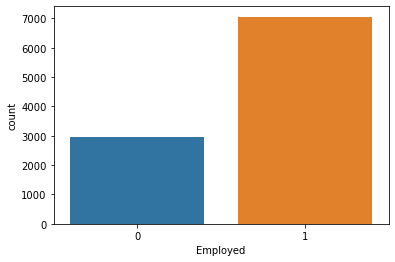

In [98]:
# observe distribution of employed 
sns.countplot(x='Employed', data=loan_df)

Approximately 30% of the individuals in this dataset are unemployed. Determining if employment is correlated with defaulting seems like an obvious next step.

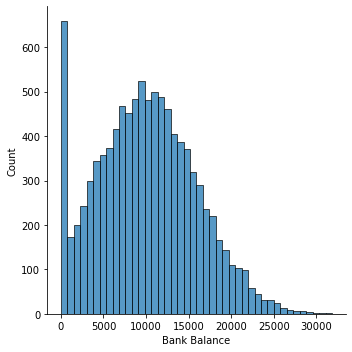

In [99]:
# observe distribution of Bank Balance
sns.displot(x='Bank Balance', data=loan_df)

The majority of bank balance values are normally distributed around $10,000 with a large blip near $0. This makes sense— some people do not have any savings. Determining if those with no savings are more likely to default is likely to reveal useful information.

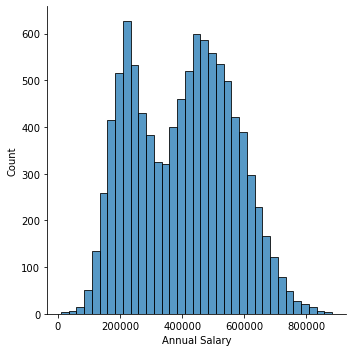

In [100]:
# observe distribution of Annual Salary
sns.displot(x='Annual Salary', data=loan_df)

The distribution of annual salary is somewhat bimodal, with a mode near $200,000 and another near $500,000. The relatively high salaries are interesting because they do not not seem to be indicative of a likelihood to default. Determining if the salary is related to probability of defaulting is going to be vital to utilizing this feature.

<AxesSubplot:xlabel='Defaulted?', ylabel='count'>

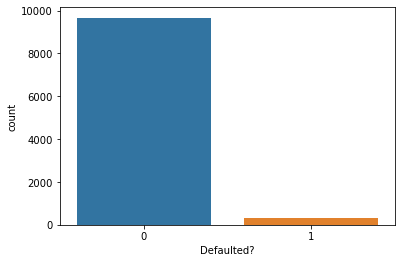

In [101]:
# observe distribution of defaulted
sns.countplot(x='Defaulted?', data=loan_df)

In this dataset, about three percent of the 10,000 indiviudals defaulted on their loans. This does not appear to clearly line up with one single feature of the dataset and thus is likely the result of numerous features compounded.

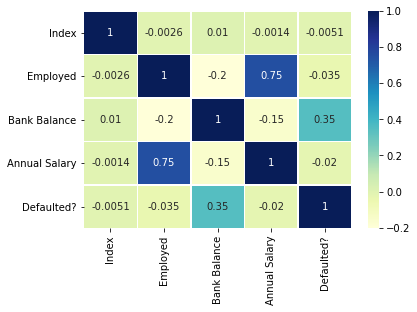

In [102]:
# get correlation between features 
corrMatrix = loan_df.corr()
sns.heatmap(corrMatrix, annot=True, linewidths=.5, cmap="YlGnBu")
plt.show()

Using a heatmap, it can be seen that there are few features that have strong correlation with one another. The strongest correlation is between annual salary and employment (annual salary does not default to $0 when the Employed feature is false) and another mild correlation is between bank balance and defaulting.

### Interactions Between data

<AxesSubplot:xlabel='Employed', ylabel='count'>

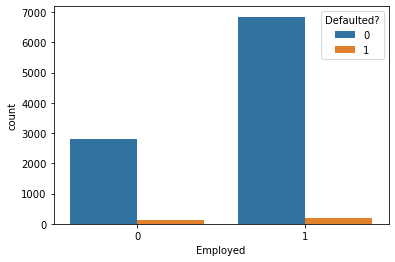

In [103]:
# investigate defaulting by employment
sns.countplot(x='Employed', hue='Defaulted?', data=loan_df)

In [104]:
loan_df.groupby(['Employed'])['Defaulted?'].sum().reset_index()

,Employed,Defaulted?
0,0,127
1,1,206


The number of defaults are similar for both employed and unemployed individuals, but a higher proportion of unemployed people defaulted compared to employed peers. Approximately 4% of unemployed individuals defaulted on their loan while about 3% of employed individuals defaulted. This is not a strong correlation individually, but it does indicate a link.

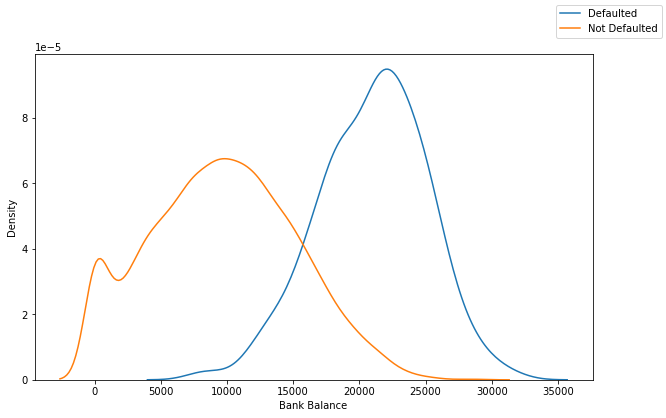

In [105]:
# investigate defaulting vs not bank balance distributions

# create sub-dataframes filtered by default
defaulted = loan_df[loan_df['Defaulted?']==1]
not_defaulted = loan_df[loan_df['Defaulted?']==0]

fig = plt.figure(figsize=(10,6))

sns.kdeplot(defaulted['Bank Balance'])
sns.kdeplot(not_defaulted['Bank Balance'])

fig.legend(labels=['Defaulted', 'Not Defaulted'])
plt.show()

On average, defaulted loans come from individuals with a higher bank balance while non-defaulted loans average bank balances are lower. This seems odd, but without knowing the size of the loan, it is impossible to know if this is the product of behavior or a lack of causality from the feature. 

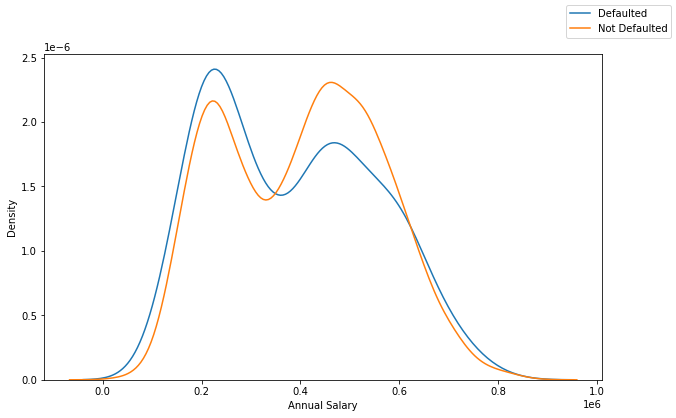

In [106]:
# investigate defaulting vs not bank balance distributions

# create sub-dataframes filtered by default
defaulted = loan_df[loan_df['Defaulted?']==1]
not_defaulted = loan_df[loan_df['Defaulted?']==0]

fig = plt.figure(figsize=(10,6))

sns.kdeplot(defaulted['Annual Salary'])
sns.kdeplot(not_defaulted['Annual Salary'])

fig.legend(labels=['Defaulted', 'Not Defaulted'])
plt.show()

On average, those who defaulted on their loans had lower average annual salaries than those who did not default on their loans. This is contrary to the relationship between defaulting and bank balance. 

### Creating Models to Predict 

In [107]:
# split data into features and labels
X = loan_df.drop(['Defaulted?'], axis=1)
y = loan_df['Defaulted?']

In [108]:
# Split data and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Logistic Regression

In [109]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(logreg.score(X_train, y_train) * 100))
print("Accuracy on testing set: {:.2f}".format(logreg.score(X_test, y_test) * 100))

Accuracy on training set: 96.45
Accuracy on testing set: 96.40


#### Decision Tree

In [110]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(d_tree.score(X_train, y_train) * 100))
print("Accuracy on testing set: {:.2f}".format(d_tree.score(X_test, y_test) * 100))

Accuracy on training set: 100.00
Accuracy on testing set: 95.64


#### K-Nearest Neighbors

In [111]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(knn.score(X_train, y_train) * 100))
print("Accuracy on testing set: {:.2f}".format(knn.score(X_test, y_test) * 100))

Accuracy on training set: 97.36
Accuracy on testing set: 96.68


#### Linear Discriminant Analysis

In [113]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(lda.score(X_train, y_train) * 100))
print("Accuracy on testing set: {:.2f}".format(lda.score(X_test, y_test) * 100))

Accuracy on training set: 97.27
Accuracy on testing set: 97.16


#### Gaussian Naive Bayes

In [115]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(gnb.score(X_train, y_train) * 100))
print("Accuracy on testing set: {:.2f}".format(gnb.score(X_test, y_test) * 100))

Accuracy on training set: 97.24
Accuracy on testing set: 96.84


#### Support Vector Machine

In [117]:
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train) * 100))
print("Accuracy on testing set: {:.2f}".format(svc.score(X_test, y_test) * 100))

Accuracy on training set: 96.64
Accuracy on testing set: 96.76


#### Generate a report on the Linear Discriminant Analysis

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2419
           1       0.44      0.10      0.16        81

    accuracy                           0.97      2500
   macro avg       0.71      0.55      0.57      2500
weighted avg       0.95      0.97      0.96      2500



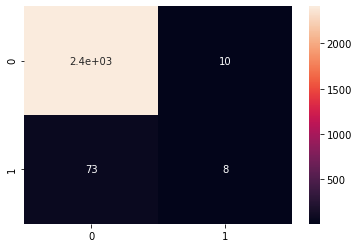

In [122]:
pred = knn.predict(X_test)
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, annot=True)
print(classification_report(y_test, pred))

For the linear discriminant analysis (the model that was most accurate in classifying the evaluation dataset), non-defaulted loans were predicted correctly nearly perfectly, but the accuracy for labeling defaulted loans is fairly poor. This dataset is extremely unbalanced and the machine learning models assume that more values are non-defaulted than actually are. The dataset is not an effective set to make predictions with. 